In [1]:
import pandas as pd
import numpy as np
from gurobipy import *
from datetime import datetime

# Erste Schritte: Data Handling
<font size="4">Lest die Datei "2020_Last_DE.csv" als Pandas-dataframe ein und lasst euch die ersten 5 Zeilen anzeigen. </font>

**Hinweis** Dateipfade müssen relativ zum verzeichnis des Jupyter Notebooks angegeben werden.

In [3]:
df = pd.read_csv("Data/2020_Last_DE.csv", sep = ";")

In [4]:
df.head()

,Datum,Uhrzeit,Gesamt (Netzlast)[MWh],Residuallast[MWh],Pumpspeicher[MWh]
0,01.01.2020,00:00,10.899,9.302,49.0
1,01.01.2020,00:15,10.837,9.241,66.0
2,01.01.2020,00:30,10.759,9.099,97.0
3,01.01.2020,00:45,10.719,8.999,129.0
4,01.01.2020,01:00,10.678,8.942,235.0


<font size="4">Erstellt eine neue Spalte mit dem Titel **"Zeitschritt"**, die sich aus den Spalten **"Datum"** und **"Uhrzeit"** zusammensetzt.<font>

In [5]:
df["Zeitschritt"] = df["Datum"] + " " + df["Uhrzeit"]
df.head()

,Datum,Uhrzeit,Gesamt (Netzlast)[MWh],Residuallast[MWh],Pumpspeicher[MWh],Zeitschritt
0,01.01.2020,00:00,10.899,9.302,49.0,01.01.2020 00:00
1,01.01.2020,00:15,10.837,9.241,66.0,01.01.2020 00:15
2,01.01.2020,00:30,10.759,9.099,97.0,01.01.2020 00:30
3,01.01.2020,00:45,10.719,8.999,129.0,01.01.2020 00:45
4,01.01.2020,01:00,10.678,8.942,235.0,01.01.2020 01:00


<font size="4">Konvertiert die Spalte Zeitschritt in das **datetime-Format.**<font>

In [6]:
df["Zeitschritt"] = pd.to_datetime(df["Zeitschritt"], format ="%d.%m.%Y %H:%M")

In [7]:
df.head()

,Datum,Uhrzeit,Gesamt (Netzlast)[MWh],Residuallast[MWh],Pumpspeicher[MWh],Zeitschritt
0,01.01.2020,00:00,10.899,9.302,49.0,2020-01-01 00:00:00
1,01.01.2020,00:15,10.837,9.241,66.0,2020-01-01 00:15:00
2,01.01.2020,00:30,10.759,9.099,97.0,2020-01-01 00:30:00
3,01.01.2020,00:45,10.719,8.999,129.0,2020-01-01 00:45:00
4,01.01.2020,01:00,10.678,8.942,235.0,2020-01-01 01:00:00


<font size="4">Definiert die Spalte "Zeitschritt" als **Index**.<font>

In [8]:
df.set_index("Zeitschritt", inplace = True)

In [9]:
df.head()

,Datum,Uhrzeit,Gesamt (Netzlast)[MWh],Residuallast[MWh],Pumpspeicher[MWh]
Zeitschritt,,,,,
2020-01-01 00:00:00,01.01.2020,00:00,10.899,9.302,49.0
2020-01-01 00:15:00,01.01.2020,00:15,10.837,9.241,66.0
2020-01-01 00:30:00,01.01.2020,00:30,10.759,9.099,97.0
2020-01-01 00:45:00,01.01.2020,00:45,10.719,8.999,129.0
2020-01-01 01:00:00,01.01.2020,01:00,10.678,8.942,235.0


<font size="4">Lasst euch die Spalte **"Gesamt (Netzlast)[MWh]"** grafisch anzeigen.<font>

<AxesSubplot:xlabel='Zeitschritt'>

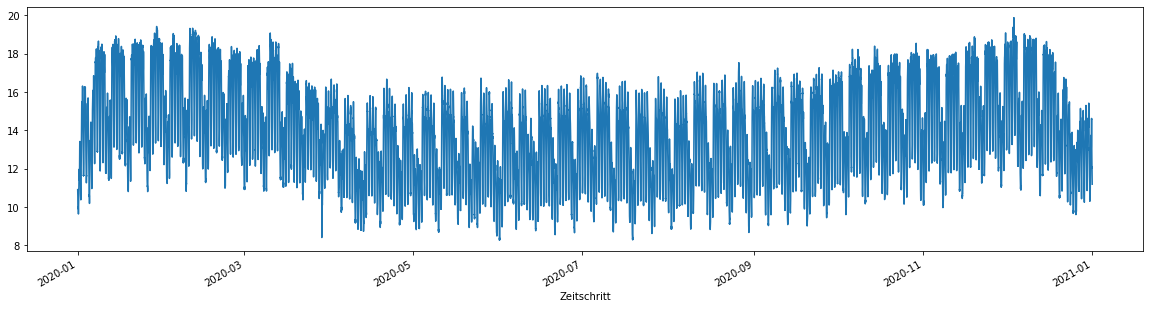

In [10]:
df["Gesamt (Netzlast)[MWh]"].plot(figsize= (20,5))

# Übungsaufgabe: Optimales Demand Side Management

Durch einen sogenannten "Real-Time-Pricing"-Tarif ist es Haushalten möglich, ihre Last in möglichst günstige Stunden zu verschieben. Im Folgenden soll eine optimale Strategie für einen Haushalt bestimmt werden, der möglichst wenig für seinen Stromverbrauch ausgeben möchte. Der Haushalt hat in jedem Zeitschritt einen fixen Lastanteil, den er nicht verschieben kann und einen flexiblen Lastanteil, den er **maximal eine Stunde** nach vorne oder hinten verschieben kann.

## Daten einlesen

Lest die CSV-Datei "SGA_Uebung0_Data.csv" ein und entfernt leere Einträge.

In [ ]:
pd.read_csv("Data

## Daten für Optimierung vorbereiten

Die Spalten unserer Inputdatei, die wir für die Modellierung des Optimierungsproblems benötigen, müssen zu Listen konvertiert werden. Dafür gibt es verschiedene Ansätze.

1. type casting

2. List comprehension

3. Spalte über Index anstatt Namen referenzieren

Bestimmt mithilfe einer Optimierung, wie der Haushalt seine Last optimal verschieben kann. **Tipp**: Schreibt euch das Optimierungsproblem zuerst formal auf einem Blatt Papier auf.

Lasst euch die Ergebnisse ausgeben